<h1 style="text-align: center">
<div style="color: #DD3403; font-size: 60%">Data Science DISCOVERY MicroProject</div>
<span style="">MicroProject: Boston Marathon </span>
<div style="font-size: 60%;"><a href="https://discovery.cs.illinois.edu/microproject/boston-marathon/">https://discovery.cs.illinois.edu/microproject/boston-marathon/</a></div>
</h1>

<hr style="color: #DD3403;">

## Data Sources: SCORE Sports Data Repository and Boston-Marathon-Data-Project

The Boston Marathon is an annual marathon hosted by several cities in greater Boston in eastern Massachusetts, United States, held on Patriots' Day, the third Monday of April. Considered one of the world's oldest and most prestigious marathons, it attracts runners from all over the globe to participate in its challenging course.


The [SCORE Sports Data Repository](https://data.scorenetwork.org/) is a curated collection of datasets across various sports, designed for use in statistics and data science education. This repository encourages exploration and analysis, organized by sport and educational topic, and is funded by the National Science Foundation​ (ScoreNetwork)​.

We will be analyzing the [2023 Boston Marathon runners](https://data.scorenetwork.org/running/boston_marathon_2023.html) dataset in this microproject.  In addition to the 2023 dataset, we will be analyzing datasets 2000 and 2010. These datasets are pulled from [Boston-Marathon-Data-Project](https://github.com/adrian3/Boston-Marathon-Data-Project), a public GitHub repository containing Boston Marathon data from 1897-2019.

## Importing The Data

The`"results2000.csv"`,`"results2010.csv"`,`"results2023.csv"` files contains data for the 2000, 2010, and 2023 Boston Marathons. Import the datasets using pandas and save them to variables called `df_2000`, `df_2010`, `df_2023`.

In [60]:
import pandas as pd
df_2000 = pd.read_csv("results2000.csv")
df_2010 = pd.read_csv("results2010.csv")
df_2023 = pd.read_csv("results2023.csv")

In [61]:
### TEST CASE for Data Import
# - This read-only cell contains a "checkpoint" for this section of the MicroProejct and verifies you are on the right track.
# - If this cell results in a celebration message, you PASSED all test cases!
# - If this cell results in any errors, check you previous cells, make changes, and RE-RUN your code and then this cell.
tada = "\N{PARTY POPPER}"

import math
assert("df_2000" in vars())
assert("df_2010" in vars())
assert("df_2023" in vars())
assert(len(df_2000) == 15247)
assert(len(df_2010) == 22255)
assert(len(df_2023) == 26598)
assert("Moses" in df_2000["first_name"].values)
assert(math.isclose( df_2000["seconds"].mean(), 13290.47871712468 ))
assert("Tekeste" in df_2010["first_name"].values)
assert(math.isclose( df_2010["seconds"].mean(), 13791.263772804889 ))
assert("Chebet, Evans" in df_2023["name"].values)
assert(8487.0 in df_2023["half_time_sec"].values)
print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


<hr style="color: #DD3403;">

# Part 1:  Longitudinal Analysis of Finish Times

In this puzzle, we're going to explore how the average, median, and variability of finish times have changed over the decades. 

## Puzzle 1.1: Creating an integer pace column in each dataframe

In order to use all of the datasets together, we need to clean them up and add new columns.  The dataset from 2000 and 2010 have a string `pace` column that contains a string of each runners average pace per mile in minutes (ex: `"00:04:56"`).  The 2023 dataset does not have a `pace` column.

We can observe this in the datasets:

In [62]:
df_2000.head()

,display_name,age,gender,residence,pace,official_time,overall,gender_result,division_result,seconds,first_name,last_name,pace_seconds,age_group
0,Gezahenge Abera,22,M,Addis Ababa,00:04:56,2:09:47,1,1,1,7787,Gezahenge,Abera,299.500000,18-39
1,Elijah Lagat,33,M,Nandi District,00:04:56,2:09:47,1,1,1,7787,Elijah,Lagat,299.500000,18-39
2,Moses Tanui,34,M,Eldoret,00:04:57,2:09:50,3,3,3,7790,Moses,Tanui,299.615385,18-39
3,Ondoro Osoro,32,M,Kisii,00:04:58,2:10:29,4,4,4,7829,Ondoro,Osoro,301.115385,18-39
4,David Busienei,25,M,Kabiet,00:05:00,2:11:26,5,5,5,7886,David,Busienei,303.307692,18-39


In [63]:
df_2010.head()

,display_name,age,gender,residence,pace,official_time,overall,gender_result,division_result,seconds,first_name,last_name,pace_seconds,age_group
0,Robert Kiprono Cheruiyot,21,M,Bomet,00:04:48,2:05:52,1.0,1.0,1.0,7552.0,Robert Kiprono,Cheruiyot,290.461538,18-39
1,Tekeste Kebede,28,M,City,00:04:51,2:07:23,2.0,2.0,1.0,7643.0,Tekeste,Kebede,293.961538,18-39
2,Deriba Merga,29,M,Addis Ababa,00:04:54,2:08:39,3.0,3.0,2.0,7719.0,Deriba,Merga,296.884615,18-39
3,Ryan Hall,27,M,Chico,00:04:54,2:08:41,4.0,4.0,3.0,7721.0,Ryan,Hall,296.961538,18-39
4,Mebrahtom Keflezighi,34,M,Mammoth Lakes,00:04:56,2:09:26,5.0,5.0,1.0,7766.0,Mebrahtom,Keflezighi,298.692308,18-39


In [64]:
df_2023.head()

,age_group,place_overall,place_gender,place_division,name,team,bib_number,half_time,finish_net,finish_gun,gender,half_time_sec,finish_net_sec,finish_gun_sec,finish_net_minutes
0,18-39,1,1,1,"Chebet, Evans",Team–,1,1H 2M 20S,2H 5M 54S,2H 5M 54S,M,3740.0,7554,7554,125.900000
1,18-39,2,2,2,"Geay, Gabriel",Team–,3,1H 2M 20S,2H 6M 4S,2H 6M 4S,M,3740.0,7564,7564,126.066667
2,18-39,3,3,3,"Kipruto, Benson",Team–,5,1H 2M 19S,2H 6M 6S,2H 6M 6S,M,3739.0,7566,7566,126.100000
3,18-39,4,4,4,"Korir, Albert",Team–,19,1H 2M 20S,2H 8M 1S,2H 8M 1S,M,3740.0,7681,7681,128.016667
4,18-39,5,5,5,"Talbi, Zouhair",Team–,31,1H 2M 20S,2H 8M 35S,2H 8M 35S,M,3740.0,7715,7715,128.583333


### Create a `pace_seconds` Column

A marathon is exactly `26.21875` miles, so if we want to get the average seconds per mile we would divide the total seconds by 26.21875.  Using the `seconds` column in the 2000 and 2010 dataset, create a column for the pace in seconds in each dataset.  Call this column `pace_seconds`:



In [65]:
df_2000["pace_seconds"] = df_2000["seconds"]/26.21875
df_2010["pace_seconds"] = df_2010["seconds"]/26.21875

Using the `"finish_net_sec"` column in the 2023 datset, create a column for the pace in seconds. Call this column `pace_seconds`.

In [66]:
df_2023["pace_seconds"] =  df_2023['finish_net_sec']/26.21875

In [67]:
### TEST CASE for Puzzle 1.1
tada = "\N{PARTY POPPER}"
assert( math.isclose( df_2000["pace_seconds"].mean(), 506.90741233371847) )
assert( math.isclose( df_2010["pace_seconds"].mean(), 526.0076766743223) )
assert( math.isclose( df_2023["pace_seconds"].mean(), 509.22095552185135) )
print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


## Puzzle 1.2: Creating `pace_minutes`

At this point, you have normalized the datasets so that all three contain `pace_seconds`! 🎉 

Instead of trying to understand how long `506` seconds take, we want to add a new column called `pace_minutes`.  This new column should just take the `pace_seconds` and divide it by `60` to get the runner's pace in minutes:

In [68]:
df_2000["pace_minutes"] = df_2000["pace_seconds"]/60
df_2010["pace_minutes"] = df_2010["pace_seconds"]/60
df_2023["pace_minutes"] = df_2023["pace_seconds"]/60

Lets take a look at the fastest runner in 2023:

In [69]:
df_2023.nsmallest(1, "finish_net_sec")[["name", "finish_net", "pace_seconds", "pace_minutes"]]

,name,finish_net,pace_seconds,pace_minutes
0,"Chebet, Evans",2H 5M 54S,288.114422,4.801907


**Verify your DataFrame is Correct**: You should find that Evans	Chebet ran at a pace of 4.8 minutes -- he completed 26.2 miles at an average pace of just 4 minutes and 48 seconds (4.802 minutes)!  That's insanely fast!!

## Puzzle 1.3: Creating an Average Paces by Age Group DataFrame

In addition to `pace_minutes` you just added, each dataset also contains the `age_group` that contains a string value of the age group of each participant (ex: `18-39`, `40-44`, etc).

We want to explore if the average time in each age group has changed significantly throughout the years.  To do this, we want to create a DataFrame with the following format:

|       | 2000 | 2010 | 2023 |
| ----- | ---- | ---- | ---- |
| 18-39 |  8.31 | 8.52 |  8.07 |
| 40-44 |  8.36 | 8.63 |  8.23 |
| ...   |  ... |  ... |  ... |

There are **many** ways to organize your data like this.  One of the most natural ways is to join the normalized datasets and create a **pivot table**.

### Creating a Pivot Table: Preparing the Data

A pivot table is a **summary** of a DataFrame created by describing:

1. The desired grouping of the rows in the result (the `index` parameter) -- in this case, each row is an `age_group`,
2. The desired grouping of the columns in the result (the `columns` parameter) -- in this case, each column is a year,
3. The desired data for each cell (the `values` parameter) -- in this case, each cell contains `pace_minutes`, **AND**
4. The method how we combine multiple `values` together if there's multiple values (ex: `mean`, `max`, `sum`, etc)

We will want to summarize all of our data, so we need to combine our three DataFrames into a single DataFrame.  Before we do that, currently, each of our DataFrames do not contain data about the year that the data contained in the DataFrame is about.

Add a new column `year` to all three DataFrames that specifies the year in which the DataFrame is from:


In [70]:
# Add a "year" column to all three DataFrames:
df_2000["year"]=2000
df_2010["year"]=2010
df_2023["year"]=2023

Now, concatenate all three DataFrames together to create one large DataFrame called `df`:

> Not sure how to combine the DataFrames?  The DISCOVERY guide [Combining DataFrames by Concatenation](https://discovery.cs.illinois.edu/guides/Combining-DataFrames/Combining-DataFrames-by-Concatenation/) can help you out here!

In [71]:
df  = pd.concat([df_2000,df_2010,df_2023],ignore_index=True)
df

,display_name,age,gender,residence,pace,official_time,overall,gender_result,division_result,seconds,...,name,team,bib_number,half_time,finish_net,finish_gun,half_time_sec,finish_net_sec,finish_gun_sec,finish_net_minutes
0,Gezahenge Abera,22.0,M,Addis Ababa,00:04:56,2:09:47,1.0,1.0,1.0,7787.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Elijah Lagat,33.0,M,Nandi District,00:04:56,2:09:47,1.0,1.0,1.0,7787.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Moses Tanui,34.0,M,Eldoret,00:04:57,2:09:50,3.0,3.0,3.0,7790.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ondoro Osoro,32.0,M,Kisii,00:04:58,2:10:29,4.0,4.0,4.0,7829.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,David Busienei,25.0,M,Kabiet,00:05:00,2:11:26,5.0,5.0,5.0,7886.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64095,NaN,NaN,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Bryan, T. J.",Team–,24573,2H 21M 27S,5H 28M 48S,5H 29M 29S,8487.0,19728.0,19769.0,328.800000
64096,NaN,NaN,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Hung, Patty",Team–,15933,2H 37M 0S,5H 40M 37S,5H 40M 58S,9420.0,20437.0,20458.0,340.616667
64097,NaN,NaN,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Tattersall, Theresa",Team–,24570,2H 41M 25S,5H 42M 59S,5H 46M 38S,9685.0,20579.0,20798.0,342.983333
64098,NaN,NaN,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Sabourin, Helen",Team–,24569,2H 31M 18S,5H 4M 6S,5H 4M 37S,9078.0,18246.0,18277.0,304.100000


In [72]:
### TEST CASE for Puzzle 1.2: Creating a Pivot Table: Preparing the Data
tada = "\N{PARTY POPPER}"
import math
assert("df" in vars())
assert("year" in df)
assert("pace_seconds" in df)
assert("pace_minutes" in df)
assert(math.isclose( df["pace_seconds"].mean(), 514.4986837163259 ))
print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


### Creating a Pivot Table: Create the Pivot Table

Finally, let's create the pivot table!

You will need to identify the four features we need in the pivot table.  The first three parameters (`index`, `columns`, and `values`) is the **name of the column in the DataFrame**.  Refer back to the beginning of this section for a reminder of the purpose of these three parameters.

Since we're calculating the **average pace for each age group**, the `aggfunc` is provided for you as `"mean"`.  Complete the below code to create the `summary`:


In [73]:
summary = df.pivot_table(
  index ="age_group",       # What grouping of data do we want in the rows of our result?
  columns ="year",     # What grouping of data do we want in the columns of our result?
  values = "pace_minutes",      # What grouping of data do we want in the cells of our result?
  aggfunc = "mean",
)

In [74]:
### TEST CASE for Puzzle 1.2: Creating a Pivot Table: Create the Pivot Table
tada = "\N{PARTY POPPER}"

import math
assert("summary" in vars())
assert(2010 in summary or "2010" in summary)
assert(math.isclose(summary.loc["18-39"].mean(), 8.30133326802205))
print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


## Puzzle 1.4: Visualizing the Result

Using your `summary` DataFrame, create a simple line chart using `summary.plot.line()` that is provided below:

<Axes: title={'center': 'Average Pace of Boston Marathon Runners across Years and Age Groups'}, xlabel='age_group', ylabel='minutes'>

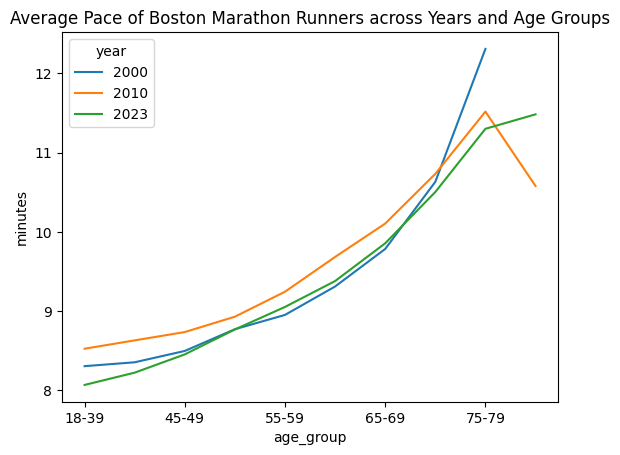

In [75]:
# Create a line char to the `summary` DataFrame:
summary.plot.line(
  ylabel="minutes",
  title="Average Pace of Boston Marathon Runners across Years and Age Groups"
)

Does it seem like marathon runners have improved over the years?

<hr style="color: #DD3403;">

## Part 2: Visualizing the Fastest Finish

Modify the code you used to create a `summary` to create a new `summary_fastest` that, instead of finding the **average** pace, find  the **fastest pace** by each age group for each year.  *(Hint: `aggfunc` may help you here!)*

In [78]:
summary_fastest = df.pivot_table(
    index="age_group",
    columns="year",
    values="pace_minutes",
    aggfunc="min"
)
summary_fastest

year,2000,2010,2023
age_group,,,
18-39,4.950020,4.800636,4.801907
40-44,5.232261,5.243067,5.454748
45-49,5.939134,5.387366,5.670242
50-54,6.226460,6.007151,5.854589
55-59,6.402543,6.195948,6.222646
60-64,6.789670,6.552563,6.354231
65-69,7.167898,7.399921,6.917441
70-74,7.906555,7.545491,7.718395
75-79,11.913866,8.980850,8.133492


### Visualize the Result

Let's see if this data looks different using the same visualization:

<Axes: title={'center': 'Fastest Pace of the Boston Marathon across Years and Age Groups'}, xlabel='age_group', ylabel='minutes'>

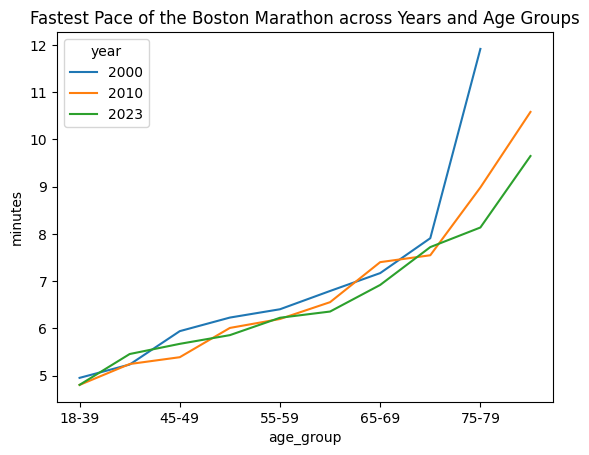

In [79]:
summary_fastest.plot.line(
  ylabel="minutes",
  title="Fastest Pace of the Boston Marathon across Years and Age Groups"
)

In [80]:
### TEST CASE for Puzzle 2: Fastest Time
tada = "\N{PARTY POPPER}"
assert(math.isclose(summary_fastest.loc["18-39"].mean(), 4.850854191497815 ))
assert(math.isclose(summary_fastest.loc["40-44"].std(), 0.12544982372057026 ))
print(f"{tada} All Tests Passed! {tada}")


🎉 All Tests Passed! 🎉


<hr style="color: #DD3403;">

## Submission

You're almost done!  All you need to do is to commit your lab to GitHub and run the GitHub Actions Grader:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and return to https://discovery.cs.illinois.edu/microproject/boston-marathon/ and complete the section **"Commit and Grade Your Notebook"**.

3. If you see a 100% grade result on your GitHub Action, you've completed this MicroProject! 🎉